# Dark Energy Survey

<div>
<img src="https://raw.githubusercontent.com/illinois-mlp/MachineLearningForPhysics/main/img/Project_DES-Figure.jpg" width=500></img>
</div>

## <span style="color:Orange">Overview</span>

The standard model of the universe, the $Λ$-CDM model, estimates that around 70% of the total energy-matter density of the universe is in the form of dark energy. The primary effect of dark energy is to acceleratingly expand the universe, hence measuring it accurately is vital to our understanding of the universe.

The Dark Energy Survey (DES) is an internationally collaborative large sky survey to map hundreds of millions of galaxies, detect thousands of supernovae, and find patterns of cosmic structure to better understand dark energy and the measure the cosmic acceleration of our expanding universe with high precision.

The instrument used by DES is the Dark Energy Camera (DECam), which is mounted on the Victor M. Blanco 4-meter Telescope at the Cerro Tololo Inter-American Observatory (CTIO) in the Chilean Andes. DECam has several major components: five optical lenses, a Hexapod positioning and alignment system, a shutter, a set of color filters, and a digital imager.

## <span style="color:Orange">Data Sources</span>

This project is based on the Data Release 1 (DR1) of the DES. We will use the `des_dr1.main` table directly from NOIRLAB's Astro Data Lab server which catalogs the DES data releases.

NOIRLAB's Astro Data Lab: https://datalab.noirlab.edu/des/access.php

## <span style="color:Orange">Importing and Setup</span>

You will need to install and import the `astro-datalab` module for data acquisition.

Please note, you will have to restart runtime to run your code after pip installing the `astro-datalab` module.

In [2]:
%pip install --no-cache-dir astro-datalab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of gwcs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.3/206.3 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 158.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 204.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 203.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 216.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 240.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 202.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 160.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import warnings; warnings.filterwarnings('ignore')
from sklearn import cluster
%matplotlib inline

# Data Lab imports
from dl import queryClient as qc, storeClient as sc
from dl.helpers.utils import convert

## <span style="color:Orange">Questions</span>

### <span style="color:LightGreen">Question 01</span>

 What is the Dark Energy Survey? What are it's main goals? What part of the night sky does the DES cover?



The Dark Energy Survey is an astronomical survey of the Southern sky. It consists primarily of data from distant galaxies, but also includes many Milky Way stars.

Its main goals are to "understand the accelerating expansion of the universe and the nature of dark energy".


### <span style="color:LightGreen">Question 02</span>

Read the DES DR1 paper [[1]](https://urldefense.com/v3/__https://arxiv.org/abs/1801.03181__;!!DZ3fjg!-VVx5uQqQ6ZzOgr-EjFgoLc8lr9NMhNBQvahQLwOY5HAZ8lWfzbxhbpxn8e7OlM44QFoWvd5J20qch77Aqg$ ). What are the four completementary measurements that DES does to probe the universe? To achieve these goals, what surveys in which wave bands does DES conduct?



DES uses weak gravitational lensing, galaxy cluster counts, large-scale clustering of galaxies, and distances to type Ia supernovae.

To achieve this, DES conducts 2 multi-band surveys: one in the *grizY* bands (5 bands), and one in the *griz* bands (4 bands).




### <span style="color:LightGreen">Question 03</span>

What is variable or feature of the data does DES use to classify its' objects  morphologically (stars or galaxies), as described in the DR1 paper [[1]](https://arxiv.org/abs/1801.03181)

DES uses a "basic selection on object size relative to the PSF [point spread function]" to morphologically classify objects (as either stars or quasars). The primary feature DES uses is SPREAD_MODEL-based classifiers.

## <span style="color:Orange">Accessing Data from Data Lab</span>

Below is a sample query statement to acquire the relevant data of the `des_dr1.main` table from Astro Data Lab [[2]](https://urldefense.com/v3/__https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/StarGalQSOSeparation/StarGalQsoDESDR1.ipynb__;!!DZ3fjg!-VVx5uQqQ6ZzOgr-EjFgoLc8lr9NMhNBQvahQLwOY5HAZ8lWfzbxhbpxn8e7OlM44QFoWvd5J20qD2flJpc$ ) .



In [2]:
# Write query statement (sql) as a string
# NOTE: triple quotes allow us to break the string on multiple lines
query = """
        SELECT mag_auto_g as gmag, mag_auto_r as rmag, mag_auto_z as zmag,
               mag_auto_i as imag, mag_auto_y as ymag,
               kron_radius, spread_model_g, class_star_g, spread_model_r, class_star_r,
               spread_model_z, class_star_z,
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main
        WHERE (fluxerr_auto_g>0 and fluxerr_auto_r>0 and fluxerr_auto_z>0)
        LIMIT 1000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# kron_radius        = Kron radius from SExtractor (pixels)
# spread_model_g,r,z = star/galaxy classifier quantifying light profile relative to PSF
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates
#
# WHERE: requirement that error>0 (to avoid dividing by zero) in g,r,z bands
# LIMIT: returns 1,000 rows that satisfy the query

In [8]:
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
sample_res = qc.query(sql=query)
sample_df = convert(sample_res,'pandas',na_values=('Infinity','-Infinity'))

In [9]:
sample_df.head()

,gmag,rmag,zmag,imag,ymag,kron_radius,spread_model_g,class_star_g,spread_model_r,class_star_r,spread_model_z,class_star_z,snr_g,snr_r,snr_z,ra,dec
0,23.428164,22.555687,22.585684,22.586412,21.265661,5.026337,-0.006941,0.357268,0.000141,0.533725,0.002032,0.078979,4.765949,8.594676,3.121491,327.346999,-39.932667
1,99.000000,23.333803,22.080177,22.252977,23.071184,6.604671,-0.001191,0.394566,-0.007467,0.462307,0.009931,0.017415,-0.075266,3.120044,3.693441,327.355357,-39.934724
2,22.910124,20.942171,19.612251,20.063360,19.421951,4.188359,0.015229,0.001203,0.015000,0.014758,0.012655,0.028581,5.135209,25.367943,32.241806,327.354060,-39.933237
3,26.020933,22.994186,22.754978,23.315079,22.271925,6.118545,-0.043813,0.354850,0.010607,0.707520,0.001032,0.690738,0.440328,5.774258,2.705117,327.198223,-39.882130
4,18.938870,18.478796,18.303375,18.355679,18.297874,3.500000,0.000332,0.873145,0.000584,0.834369,0.000868,0.921199,225.105270,281.489800,132.321320,327.203267,-39.882279


### <span style="color:LightGreen">Question 04</span>

Write a query to get the following data from the `des_dr1.main` table:

*  `mag_auto_g,r,i,z,y` = AB magnitudes in DECam g,r,i,z,y bands
*  `kron_radius`        = Kron radius from SExtractor (pixels)
* `spread_model_g,r,z` = star/galaxy classifier quantifying light profile relative to PSF
* `class_star_g,r,z`   = star/extended source classifier (from 0 to 1)
* `snr_g,r,z`          = computed signal-to-noise ratios (S/N) in g,r,z bands
* `ra`,`dec`             = celestial coordinates

Apply the following conditions and limit your query results to 100,000 samples:

*   `fluxerr_auto_X` > 0 for X in g, r, and z bands
*   -50 <= `snr_X` <= 50 for X in g, r, and z bands


Convert the acquired data into a Pandas data frame.


In [10]:
query2 = """
        SELECT mag_auto_g as gmag, mag_auto_r as rmag, mag_auto_z as zmag,
               mag_auto_i as imag, mag_auto_y as ymag,
               kron_radius, spread_model_g, class_star_g, spread_model_r, class_star_r,
               spread_model_z, class_star_z,
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main
        WHERE (fluxerr_auto_g>0 and fluxerr_auto_r>0 and fluxerr_auto_z>0
        AND snr_g BETWEEN -50 AND 50
        AND snr_r BETWEEN -50 AND 50
        AND snr_z BETWEEN -50 AND 50)
        LIMIT 100000"""

sample_res2 = qc.query(sql=query2)
sample_df2 = convert(sample_res2,'pandas',na_values=('Infinity','-Infinity'))

In [11]:
sample_df2.head()

,gmag,rmag,zmag,imag,ymag,kron_radius,spread_model_g,class_star_g,spread_model_r,class_star_r,spread_model_z,class_star_z,snr_g,snr_r,snr_z,ra,dec
0,22.115036,99,99.000000,99.0,99.000000,8.449265,0.012004,0.042333,1.000000,0.349992,1.000000,0.009584,5.640619,-49.992058,-9.495123,19.846645,-53.602146
1,23.964737,99,99.000000,99.0,99.000000,8.983423,0.008607,0.607084,1.000000,0.019274,1.000000,0.395193,2.208419,-49.986885,-6.294527,23.626489,-29.413980
2,99.000000,99,23.928865,99.0,23.879759,3.500000,-0.100816,0.284600,-0.010246,0.012631,0.004203,0.002869,-0.268048,-49.974236,0.982654,53.554756,-44.696893
3,99.000000,99,99.000000,99.0,99.000000,8.545079,-0.028510,0.514376,1.000000,0.418036,1.000000,0.442787,-4.645531,-49.971180,-3.901429,306.153553,-56.852316
4,22.759033,99,99.000000,99.0,99.000000,8.618557,-0.008259,0.369813,1.000000,0.347991,1.000000,0.502264,3.931107,-49.966644,-2.693714,82.089033,-20.866155


### <span style="color:LightGreen">Question 05</span>

The images produced by DES are used to distinguish between stars (point sources), galaxies (resolved, if not too distant), and QSOs (which may have both point-like and resolved components).

* `kron_radius`: Kron radius in pixels
* `spread_model_X`: star-galaxy classifier comparing extended model to PSF model. Value is given for each band X = *g, r, i, z, y*
* `class_star_X`: value ranging from 0.0 (not point-like) to 1.0 (point-like), for each band X = *g, r, i, z, y*

The value of `spread_model_X` is near zero for a point source (star or QSO), positive for an extended source (galaxy), negative for an artifact smaller than the PSF (e.g., bad pixel or cosmic ray).

Let's define an object as a star if `spread_model_g`<=0.5, and a galaxy if `spread_model_g` > 0.5. In our sample data, count the number of objects that are stars and the number of objects that are galaxies.

In [12]:
star_count = len(sample_df2[sample_df2['spread_model_g']<=0.5])
galaxy_count = len(sample_df2[sample_df2['spread_model_g']>0.5])
print(f"Number of stars: {star_count}")
print(f"Number of galaxies: {galaxy_count}")

Number of stars: 64836
Number of galaxies: 35164


### <span style="color:LightGreen">Question 06</span>

Suppose we wish to divide the imaging data observed by the DES into roughly equal subsets of data for more efficient parallel data processing and analysis. We will do so by using K-Means clustering on the data points of the area of the night sky observed by DES.

In astronomy, RA (right ascension) and Dec (declination) are the coordinates on the sky that correspond to longitude and latitude on Earth and are used to describe the position of an object. Define a subset of the data with two columns: `ra` and `dec`. Using K-Means clustering, fit the data into 2 distinct clusters.

Here, each cluster will represent a subset of data, so we want the number data points of all clusters to be roughly the same. Display the fit using the helper function `display()`. Is the result what you expected? Is this a suitable method to equally divide our data?

In [24]:
def display(data, fit):
    n_clusters = len(np.unique(fit.labels_))
    # Pick good colors to distinguish the different clusters.
    import matplotlib.colors
    cmap = matplotlib.colors.ListedColormap(
        sns.color_palette("husl", n_clusters).as_hex())
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], s=5, c=fit.labels_, cmap=cmap)
    # Use standard axes to match the plot above.
    #plt.xlim(0, 360)
    plt.ylim(-90, +90)
    plt.xlabel('RA [degrees]')
    plt.ylabel('Dec [degrees]')
    plt.gca().set_aspect(1.)

In [25]:
coordinates = sample_df2[['ra', 'dec']]
kmeans = cluster.KMeans(n_clusters=2)

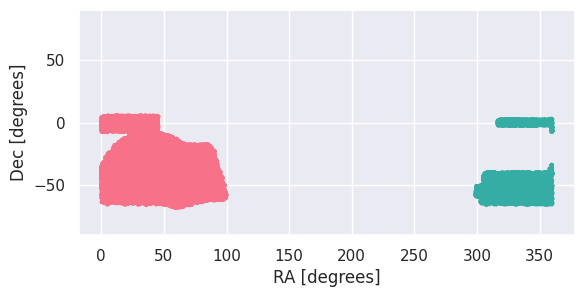

In [26]:
display(coordinates, kmeans.fit(coordinates))

The two clusters appear spatially distinct on the graph, but when considering the fact that in actuality, 0 and 360 degrees are the same, these clusters are actually very close together in the actual sky, and this may not be the best way to cluster the data. Furthermore, the right cluster appears MUCH bigger than the left cluster (as in, it likely contains more points). We can verify this:

In [27]:
_, cluster_count = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of data points in cluster 0: {cluster_count[0]}")
print(f"Number of data points in cluster 1: {cluster_count[1]}")

Number of data points in cluster 0: 77755
Number of data points in cluster 1: 22245


... so the size of the clusters are nowhere near equal, with cluster 0 over 3 times the size of cluster 1.

This does not seem like the most effective way to equally divide the data, especially because the clusters do not seem to accurately reflect the gaps existing between data points.

### <span style="color:LightGreen">Question 07</span>

Modify the `ra` column such that if `ra` >= 180 deg, we subtract 360 deg from `ra` for our observed sky map to be continuous. Now, change the number of clusters so that each cluster covers roughly equal area of the observed sky? For what `n_clusters` does the K-means clustering make the most sense to you?

However, you shouldn't increase `n_clusters` to an arbitrarily large number just to get equally covered area of the observed sky - each cluster would represent a subset of data we use for parallel processing, and requiring more processors is not always feasible or sensible.

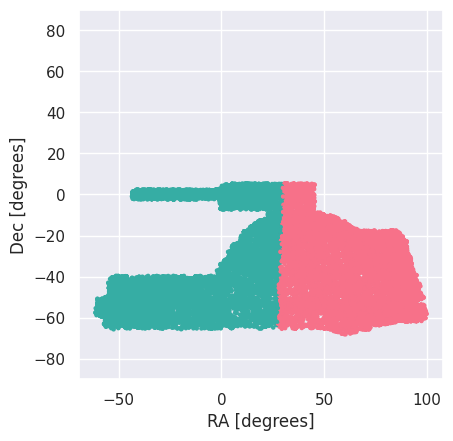

In [28]:
continuous_coords = sample_df2[['ra', 'dec']]
for i, coord in enumerate(continuous_coords['ra']):
  if coord >= 180.:
    continuous_coords['ra'][i] = (coord - 360.)

kmeans = cluster.KMeans(n_clusters=2)

display(continuous_coords, kmeans.fit(continuous_coords))

In [23]:
_, cluster_count = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of data points in cluster 0: {cluster_count[0]}")
print(f"Number of data points in cluster 1: {cluster_count[1]}")


Number of data points in cluster 0: 49827
Number of data points in cluster 1: 50173


... so the clusters in the continuous data are much closer in size when we make the data continuous. However, the K-means clustering still does not seem to accurately reflect the structure of the data. There are some clusters of points that seem like they should be grouped together, and perhaps could be if more clusters were used.

If we want to compare the *areas* of each cluster, we need to determine their convex hulls. We can first check if the areas of night sky encompassed by each cluster are roughly equal for k = 2:

In [32]:
import scipy as sci

k = 2

for i in range(k):



SyntaxError: invalid syntax (<ipython-input-32-74b7ef4fb62e>, line 2)

In [82]:
for i in range(2, 20):
  kmeans = cluster.KMeans(n_clusters=i)
  kmeans.fit(continuous_coords)
  _, cluster_count = np.unique(kmeans.labels_, return_counts=True)
  print(f"Cluster sizes for {i} clusters: {cluster_count}\n standard deviation in cluster size: {np.std(cluster_count)}")

Cluster sizes for 2 clusters: [540 460]
 standard deviation in cluster size: 40.0
Cluster sizes for 3 clusters: [308 294 398]
 standard deviation in cluster size: 46.082052423427875
Cluster sizes for 4 clusters: [310 222 273 195]
 standard deviation in cluster size: 44.54772721475249
Cluster sizes for 5 clusters: [221 186 210 144 239]
 standard deviation in cluster size: 32.84509095740184
Cluster sizes for 6 clusters: [171 120 120 220 210 159]
 standard deviation in cluster size: 39.06262777756879
Cluster sizes for 7 clusters: [197 220 175  71 139  98 100]
 standard deviation in cluster size: 52.02040416009464
Cluster sizes for 8 clusters: [152  93 155 220  74 137 100  69]
 standard deviation in cluster size: 47.67598976424087
Cluster sizes for 9 clusters: [126 111 133 124 123 109  92 110  72]
 standard deviation in cluster size: 17.97803872904967
Cluster sizes for 10 clusters: [128  94 124 122 116  79  69 126  50  92]
 standard deviation in cluster size: 26.034592372457073
Cluster siz

In [ ]:
for i in range(2, 20):
  kmeans = cluster.KMeans(n_clusters=i)
  kmeans.fit(continuous_coords)
  _, cluster_count = np.unique(kmeans.labels_, return_counts=True)
  print(f"Cluster sizes for {i} clusters: {cluster_count}\n standard deviation in cluster size: {np.std(cluster_count)}")

To get the *area* of each cluster, we need to compute the convex hull.

The standard deviation decreases as the number of clusters increases.

## <span style="color:Orange">References</span>

* [__<span style="color:Red">1</span>__] Jupyter Notebook Example from Astro Data Lab using DES DR1: https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/StarGalQSOSeparation/StarGalQsoDESDR1.ipynb

* __[<span style="color:Red">2</span>]__ DES Collaboration "The Dark Energy Survey Data Release 1" ApJS 239, 18, 2018, https://arxiv.org/abs/1801.03181

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://spie.org/Publications/Proceedings/Paper/10.1117/12.2057445?SSO=1

* Data Lab disclaimer: https://datalab.noirlab.edu/disclaimers.php

## <span style="color:Orange">Acknowledgements</span>

* Initial version: Ferzem Khan with some guidance from Mark Neubauer

© Copyright 2024